<a href="https://www.kaggle.com/code/ghassenkhaled/introduction-to-generative-ai?scriptVersionId=222533281" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Introduction to Generative AI with HuggingFace

you'll explore various aspects of GenAI using HuggingFace tools and models. You'll work with text generation, translation, image generation, and audio processing.

## Objectives:
1. Set up the necessary libraries and environment
2. Experiment with text generation using GPT-2
3. Perform text translation
4. Generate images using Stable Diffusion
5. Work with audio generation and transcription

Let's get started!

## 1. Setup and Imports

First, let's install the necessary libraries and import them. Run the following cells to set up your environment.

In [1]:
!pip install -q transformers diffusers torch pydub TTS openai-whisper accelerate numba

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 800.5/800.5 kB 20.6 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.5/73.5 kB 6.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.7/3.7 MB 85.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.6/101.6 kB 6.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.3/15.3 MB 98.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.1/18.1 MB 93.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 31.4/31.4 MB 61.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━

In [2]:
import torch
from transformers import pipeline, GPT2LMHeadModel, GPT2Tokenizer
from transformers import MarianMTModel, MarianTokenizer
from diffusers import StableDiffusionPipeline
from IPython.display import Audio, display
import numpy as np
from TTS.api import TTS
import whisper

USE_CUDA = True
device = "cuda" if USE_CUDA and torch.cuda.is_available() else "cpu"
print(f"Using device: {device}")

Using device: cuda


## 2. Text Generation with GPT-2

Let's start by generating text using the GPT-2 model. You'll create a function to generate text based on a given prompt.

In [3]:
def generate_text(prompt, max_length=50):
    model_name = "gpt2-medium"
    model = GPT2LMHeadModel.from_pretrained(model_name).to(device)
    tokenizer = GPT2Tokenizer.from_pretrained(model_name)
    
    inputs = tokenizer(prompt, return_tensors="pt").to(device)
    outputs = model.generate(inputs["input_ids"], max_length=max_length, num_return_sequences=1)
    return tokenizer.decode(outputs[0], skip_special_tokens=True)

# Test the function
prompt = "Once upon a time in a land far, far away"
generated_text = generate_text(prompt)
print("Generated Text:")
print(generated_text)

config.json:   0%|          | 0.00/718 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.52G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
The attention mask is not set and cannot be inferred from input because pad token is same as eos token. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.


Generated Text:
Once upon a time in a land far, far away, there lived a man named Jorunn. He was a wise man, and he knew the secrets of the world. He knew the secrets of the world, and he knew the secrets of


### Exercise 1: Creative Writing
Generate a short story using GPT-2. Use a prompt of your choice and set the `max_length` to 100. Analyze the output and discuss any interesting patterns or unexpected results you observe.

In [4]:
# Your code here
creative_prompt = "The robot woke up and realized it had emotions"
story = generate_text(creative_prompt, max_length=100)
print(story)


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


The robot woke up and realized it had emotions. It was a robot. It was a robot that had emotions. It was a robot that had emotions. It was a robot that had emotions. It was a robot that had emotions. It was a robot that had emotions. It was a robot that had emotions. It was a robot that had emotions. It was a robot that had emotions. It was a robot that had emotions. It was a robot that had emotions. It was a robot that


## 3. Text Translation

Now, let's work on translating text from one language to another using the MarianMT model.

In [5]:
def translate_text(text, src_lang="en", tgt_lang="fr"):
    model_name = f"Helsinki-NLP/opus-mt-{src_lang}-{tgt_lang}"
    model = MarianMTModel.from_pretrained(model_name).to(device)
    tokenizer = MarianTokenizer.from_pretrained(model_name)
    
    inputs = tokenizer(text, return_tensors="pt", padding=True).to(device)
    translated = model.generate(**inputs)
    return tokenizer.decode(translated[0], skip_special_tokens=True)

# Test the function
text_to_translate = "Hello, how are you?"
translated_text = translate_text(text_to_translate)
print(f"Original: {text_to_translate}")
print(f"Translated: {translated_text}")

config.json:   0%|          | 0.00/1.42k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/301M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/293 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/42.0 [00:00<?, ?B/s]

source.spm:   0%|          | 0.00/778k [00:00<?, ?B/s]

target.spm:   0%|          | 0.00/802k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.34M [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/models/marian/tokenization_marian.py:175: UserWarning: Recommended: pip install sacremoses.
  warnings.warn("Recommended: pip install sacremoses.")


Original: Hello, how are you?
Translated: Bonjour, comment allez-vous ?


### Exercise 2: Multi-language Translation
Translate a sentence of your choice into three different languages. Then, translate each result back to English. Discuss any changes in meaning or nuances that occurred during the translation process.

In [6]:
# Your code here
original_sentence = "The quick brown fox jumps over the lazy dog"
languages = ["fr", "de", "es"]

for lang in languages:
    translated = translate_text(original_sentence, "en", lang)
    back_translated = translate_text(translated, lang, "en")
    print(f"{lang.upper()}: {translated}")
    print(f"Back to English: {back_translated}\n")



config.json:   0%|          | 0.00/1.42k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/301M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/293 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/42.0 [00:00<?, ?B/s]

source.spm:   0%|          | 0.00/802k [00:00<?, ?B/s]

target.spm:   0%|          | 0.00/778k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.34M [00:00<?, ?B/s]

FR: Le renard brun rapide saute sur le chien paresseux
Back to English: The fast brown fox jumps on the lazy dog



config.json:   0%|          | 0.00/1.33k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/298M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/293 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/42.0 [00:00<?, ?B/s]

source.spm:   0%|          | 0.00/768k [00:00<?, ?B/s]

target.spm:   0%|          | 0.00/797k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.27M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.38k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/298M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/293 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/42.0 [00:00<?, ?B/s]

source.spm:   0%|          | 0.00/797k [00:00<?, ?B/s]

target.spm:   0%|          | 0.00/768k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.27M [00:00<?, ?B/s]

DE: Der schnelle Braunfuchs springt über den faulen Hund
Back to English: The fast brown fox jumps over the lazy dog



config.json:   0%|          | 0.00/1.47k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/312M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/293 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/44.0 [00:00<?, ?B/s]

source.spm:   0%|          | 0.00/802k [00:00<?, ?B/s]

target.spm:   0%|          | 0.00/826k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.59M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.44k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/312M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/293 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/44.0 [00:00<?, ?B/s]

source.spm:   0%|          | 0.00/826k [00:00<?, ?B/s]

target.spm:   0%|          | 0.00/802k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.59M [00:00<?, ?B/s]

ES: El rápido zorro marrón salta sobre el perro perezoso
Back to English: The fast brown fox jumps on the lazy dog



## 4. Image Generation with Stable Diffusion

Let's explore image generation using the Stable Diffusion model.

model_index.json:   0%|          | 0.00/541 [00:00<?, ?B/s]

Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]

model.safetensors:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/492M [00:00<?, ?B/s]

(…)ure_extractor%2Fpreprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

scheduler%2Fscheduler_config.json:   0%|          | 0.00/308 [00:00<?, ?B/s]

tokenizer%2Fmerges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

text_encoder%2Fconfig.json:   0%|          | 0.00/617 [00:00<?, ?B/s]

safety_checker%2Fconfig.json:   0%|          | 0.00/4.72k [00:00<?, ?B/s]

tokenizer%2Fspecial_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

tokenizer%2Ftokenizer_config.json:   0%|          | 0.00/806 [00:00<?, ?B/s]

tokenizer%2Fvocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

unet%2Fconfig.json:   0%|          | 0.00/743 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

vae%2Fconfig.json:   0%|          | 0.00/547 [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

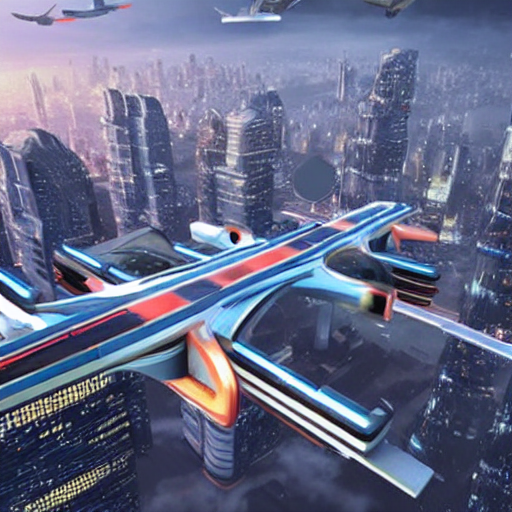

In [7]:
def generate_image(prompt, output_path="generated_image.png"):
    model_id = "runwayml/stable-diffusion-v1-5"
    pipe = StableDiffusionPipeline.from_pretrained(model_id, torch_dtype=torch.float16).to(device)
    
    image = pipe(prompt, num_inference_steps=50, guidance_scale=7.5).images[0]
    image.save(output_path)
    display(image)

# Test the function
image_prompt = "A futuristic city with flying cars"
generate_image(image_prompt)

### Exercise 3: Creative Image Generation
Generate three different images using creative prompts of your choice. For each image, describe the prompt you used and analyze how well the generated image matches your intention. Discuss any unexpected or interesting elements in the images.

Prompt 1: A steampunk-inspired coffee machine


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

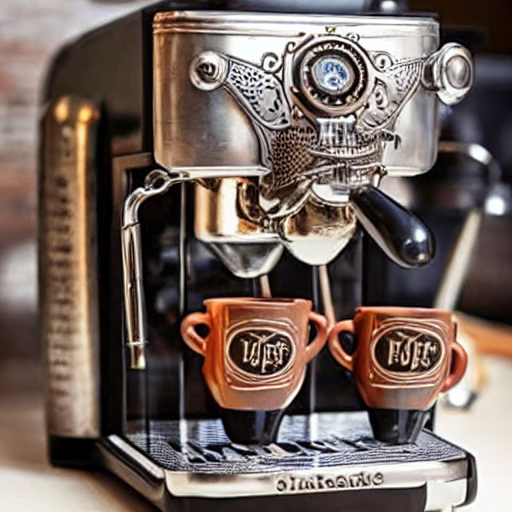



Prompt 2: An underwater library with merfolk readers


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

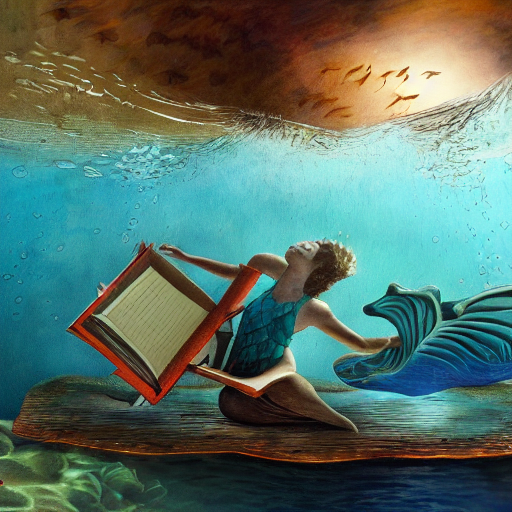



Prompt 3: A treehouse skyscraper in a futuristic forest


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

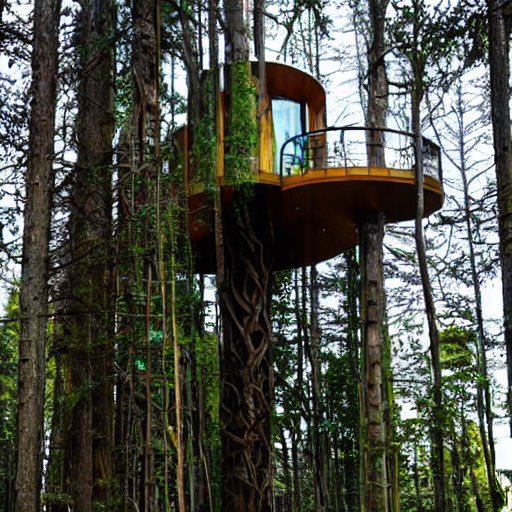

In [8]:
# Your code here
prompts = [
    "A steampunk-inspired coffee machine",
    "An underwater library with merfolk readers",
    "A treehouse skyscraper in a futuristic forest"
]

for i, prompt in enumerate(prompts):
    print(f"Prompt {i+1}: {prompt}")
    generate_image(prompt, f"image_{i+1}.png")
    print("\n")


## 5. Audio Generation and Transcription

Finally, let's work with audio generation and transcription using TTS and Whisper models.

In [9]:
def generate_audio(text, output_path="output.wav"):
    tts = TTS(model_name="tts_models/en/ljspeech/tacotron2-DDC", progress_bar=True, gpu=USE_CUDA)
    tts.tts_to_file(text=text, file_path=output_path)
    display(Audio(output_path))

def transcribe_audio(file_path):
    model = whisper.load_model("base")
    result = model.transcribe(file_path)
    return result["text"]

# Test the functions
text_to_speak = "Hello, this is a test of text-to-speech conversion."
generate_audio(text_to_speak)

transcribed_text = transcribe_audio("output.wav")
print("Transcribed Text:")
print(transcribed_text)

/usr/local/lib/python3.10/dist-packages/TTS/api.py:70: UserWarning: `gpu` will be deprecated. Please use `tts.to(device)` instead.
  warnings.warn("`gpu` will be deprecated. Please use `tts.to(device)` instead.")


 > Downloading model to /root/.local/share/tts/tts_models--en--ljspeech--tacotron2-DDC


 94%|█████████▍| 106M/113M [00:01<00:00, 95.7MiB/s]

 > Model's license - apache 2.0
 > Check https://choosealicense.com/licenses/apache-2.0/ for more info.
 > Downloading model to /root/.local/share/tts/vocoder_models--en--ljspeech--hifigan_v2



100%|██████████| 113M/113M [00:02<00:00, 53.8MiB/s]


 > Model's license - apache 2.0
 > Check https://choosealicense.com/licenses/apache-2.0/ for more info.
 > Using model: Tacotron2
 > Setting up Audio Processor...
 | > sample_rate:22050
 | > resample:False
 | > num_mels:80
 | > log_func:np.log
 | > min_level_db:-100
 | > frame_shift_ms:None
 | > frame_length_ms:None
 | > ref_level_db:20
 | > fft_size:1024
 | > power:1.5
 | > preemphasis:0.0
 | > griffin_lim_iters:60
 | > signal_norm:False
 | > symmetric_norm:True
 | > mel_fmin:0
 | > mel_fmax:8000.0
 | > pitch_fmin:1.0
 | > pitch_fmax:640.0
 | > spec_gain:1.0
 | > stft_pad_mode:reflect
 | > max_norm:4.0
 | > clip_norm:True
 | > do_trim_silence:True
 | > trim_db:60
 | > do_sound_norm:False
 | > do_amp_to_db_linear:True
 | > do_amp_to_db_mel:True
 | > do_rms_norm:False
 | > db_level:None
 | > stats_path:None
 | > base:2.718281828459045
 | > hop_length:256
 | > win_length:1024


/usr/local/lib/python3.10/dist-packages/TTS/utils/io.py:54: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  return torch.load(f, map_location=map_location, **kwargs)


 > Model's reduction rate `r` is set to: 1
 > Vocoder Model: hifigan
 > Setting up Audio Processor...
 | > sample_rate:22050
 | > resample:False
 | > num_mels:80
 | > log_func:np.log
 | > min_level_db:-100
 | > frame_shift_ms:None
 | > frame_length_ms:None
 | > ref_level_db:20
 | > fft_size:1024
 | > power:1.5
 | > preemphasis:0.0
 | > griffin_lim_iters:60
 | > signal_norm:False
 | > symmetric_norm:True
 | > mel_fmin:0
 | > mel_fmax:8000.0
 | > pitch_fmin:1.0
 | > pitch_fmax:640.0
 | > spec_gain:1.0
 | > stft_pad_mode:reflect
 | > max_norm:4.0
 | > clip_norm:True
 | > do_trim_silence:False
 | > trim_db:60
 | > do_sound_norm:False
 | > do_amp_to_db_linear:True
 | > do_amp_to_db_mel:True
 | > do_rms_norm:False
 | > db_level:None
 | > stats_path:None
 | > base:2.718281828459045
 | > hop_length:256
 | > win_length:1024
 > Generator Model: hifigan_generator
 > Discriminator Model: hifigan_discriminator
Removing weight norm...
 > Text splitted to sentences.
['Hello, this is a test of text-to

100%|████████████████████████████████████████| 139M/139M [00:00<00:00, 174MiB/s]
/usr/local/lib/python3.10/dist-packages/whisper/__init__.py:150: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this exper

Transcribed Text:
 Hello, this is a test of text-to-speech conversion.


### Exercise 4: Audio Chain
Create a chain of operations: 
1. Generate text using GPT-2
2. Convert that text to speech
3. Transcribe the generated audio back to text

Compare the original generated text with the final transcription. Discuss any differences and potential reasons for these differences.

In [10]:
# Your code here
original_prompt = "The future of artificial intelligence is"
generated_text = generate_text(original_prompt, max_length=50)
print("Original Generated Text:")
print(generated_text)

generate_audio(generated_text, "chain_output.wav")

transcribed_text = transcribe_audio("chain_output.wav")
print("\nTranscribed Text:")
print(transcribed_text)


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Original Generated Text:
The future of artificial intelligence is in the hands of the people.

The future of artificial intelligence is in the hands of the people.

The future of artificial intelligence is in the hands of the people.

The future of artificial intelligence
 > tts_models/en/ljspeech/tacotron2-DDC is already downloaded.
 > vocoder_models/en/ljspeech/hifigan_v2 is already downloaded.
 > Using model: Tacotron2
 > Setting up Audio Processor...
 | > sample_rate:22050
 | > resample:False
 | > num_mels:80
 | > log_func:np.log
 | > min_level_db:-100
 | > frame_shift_ms:None
 | > frame_length_ms:None
 | > ref_level_db:20
 | > fft_size:1024
 | > power:1.5
 | > preemphasis:0.0
 | > griffin_lim_iters:60
 | > signal_norm:False
 | > symmetric_norm:True
 | > mel_fmin:0
 | > mel_fmax:8000.0
 | > pitch_fmin:1.0
 | > pitch_fmax:640.0
 | > spec_gain:1.0
 | > stft_pad_mode:reflect
 | > max_norm:4.0
 | > clip_norm:True
 | > do_trim_silence:True
 | > trim_db:60
 | > do_sound_norm:False
 | > d

/usr/local/lib/python3.10/dist-packages/TTS/api.py:70: UserWarning: `gpu` will be deprecated. Please use `tts.to(device)` instead.
  warnings.warn("`gpu` will be deprecated. Please use `tts.to(device)` instead.")
/usr/local/lib/python3.10/dist-packages/TTS/utils/io.py:54: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use

 > Model's reduction rate `r` is set to: 1
 > Vocoder Model: hifigan
 > Setting up Audio Processor...
 | > sample_rate:22050
 | > resample:False
 | > num_mels:80
 | > log_func:np.log
 | > min_level_db:-100
 | > frame_shift_ms:None
 | > frame_length_ms:None
 | > ref_level_db:20
 | > fft_size:1024
 | > power:1.5
 | > preemphasis:0.0
 | > griffin_lim_iters:60
 | > signal_norm:False
 | > symmetric_norm:True
 | > mel_fmin:0
 | > mel_fmax:8000.0
 | > pitch_fmin:1.0
 | > pitch_fmax:640.0
 | > spec_gain:1.0
 | > stft_pad_mode:reflect
 | > max_norm:4.0
 | > clip_norm:True
 | > do_trim_silence:False
 | > trim_db:60
 | > do_sound_norm:False
 | > do_amp_to_db_linear:True
 | > do_amp_to_db_mel:True
 | > do_rms_norm:False
 | > db_level:None
 | > stats_path:None
 | > base:2.718281828459045
 | > hop_length:256
 | > win_length:1024
 > Generator Model: hifigan_generator
 > Discriminator Model: hifigan_discriminator
Removing weight norm...
 > Text splitted to sentences.
['The future of artificial intelli

/usr/local/lib/python3.10/dist-packages/whisper/__init__.py:150: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load(fp, map_location=device)



Transcribed Text:
 the future of artificial intelligence is in the hands of the people the future of artificial intelligence is in the hands of the people the future of artificial intelligence is in the hands of the people the future of artificial intelligence
